In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Show plots inline.
%matplotlib inline

# Number of harmonics to include in subsequent plots.
Harmonics = 10
# Time in seconds.
Time = 2.0
# Plot resolution.
Steps = 200

# Array of step values.
def time_space(sec=Time, samples=Steps):
    '''An array of equally spaced samples over a period of time.'''
    # One extra sample to also include the endpoint.
    return np.linspace(0, sec, num=samples + 1)

def sample_rate(sec=Time, samples=Steps):
    '''Sampling rate in samples per second.'''
    return (samples + 1) / float(sec)

def frequency_spectrum(data):
    '''Perform an FFT on `data`. Return the max frequency in Hz, and the raw data, suitable for plotting.'''
    fft = np.fft.fft(data)
    # We only need to use half of the FFT because FFT data mirrors itself across the middle. (Or something? IDK?)
    fft_len = int(len(fft) / 2)  
    
    # Get the frequency of coefficients in the FFT.
    freqs = np.fft.fftfreq(fft_len)
    
    # Get the highest frequency in the FFT
    max_idx = np.argmax(np.abs(fft))
    max_freq = fft[max_idx]
    
    # Convert that frequency above into Hz.
    max_freq_hz = abs(max_freq * sample_rate() ** -1)
    
    out = np.abs(fft[:fft_len - 1] * sample_rate())
    return max_freq_hz, out

# Basic Waves

## Sine Wave

Sine waves are easy. 😁 The have a single frequency, and no harmonics.

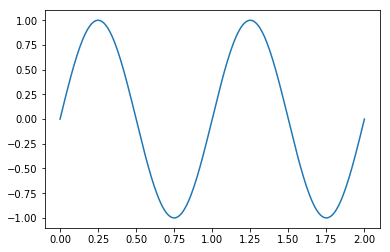

In [10]:
# Sine wave.

def sine(domain, freq=1.0):
    return np.sin(2.0 * np.pi * freq * domain)

wave = sine(time_space())
plt.plot(time_space(), wave)

max: 0.9973405302244392 Hz


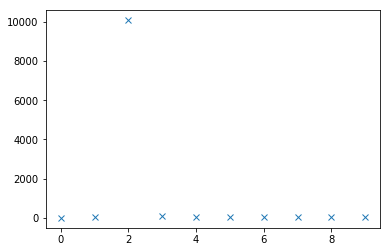

In [11]:
max_hz, spectrum = frequency_spectrum(wave)
print("max: {} Hz".format(max_hz))
plt.plot(spectrum[:Harmonics], 'x')

## Saw Wave

Saw waves consist of every integer harmonic _n_ above the fundamental frequency, where that harmonic's amplitude is n<sup>-1</sup>.

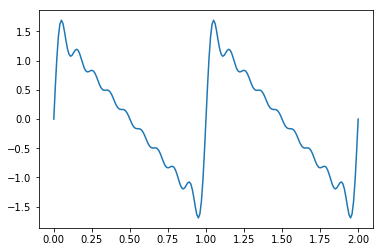

In [12]:
def saw(domain, freq=1):
    harmonics = np.asarray([1.0 / h * sine(domain, freq=freq * h) for h in range(1, Harmonics)])
    wave = np.sum(harmonics, axis=0)
    return wave

wave = saw(time_space())
plt.plot(time_space(), wave)

max: 1.0036806672579326 Hz


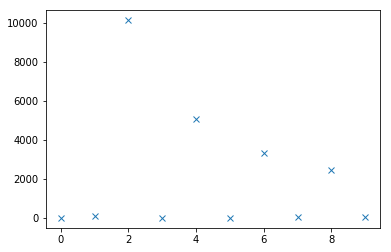

In [13]:
max_hz, spectrum = frequency_spectrum(wave)
print("max: {} Hz".format(max_hz))
plt.plot(spectrum[:Harmonics], 'x')

You can invert a saw wave to get what many synths call a "blade" wave. Instead of gradually falling and then spiking up, blade waves gradually rise and the sharply fall.

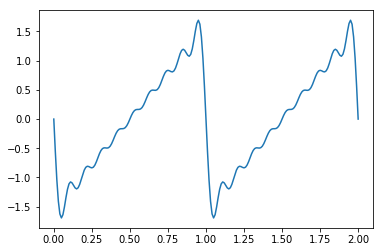

In [14]:
plt.plot(time_space(), -1 * saw(time_space()))

## Square Wave

Square waves are made of every other harmonic above the fundamental frequency. Again, the amplitude of each harmonic _n_ is _1 / n_.

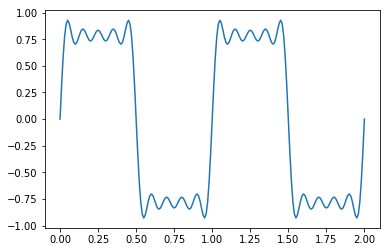

In [15]:
def square(domain, freq=1):
    harmonics = np.asarray([1.0 / h * sine(domain, freq=freq * h) for h in range(1, Harmonics, 2)])
    wave = np.sum(harmonics, axis=0)
    return wave

wave = square(time_space())
plt.plot(time_space(), wave)

max: 0.9993055302951397 Hz


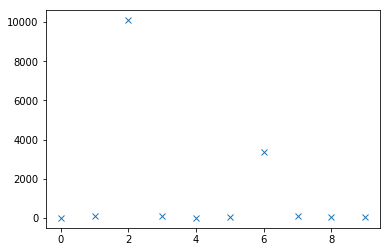

In [16]:
max_hz, spectrum = frequency_spectrum(wave)
print("max: {} Hz".format(max_hz))
plt.plot(spectrum[:Harmonics], 'x')

## Triangle Wave

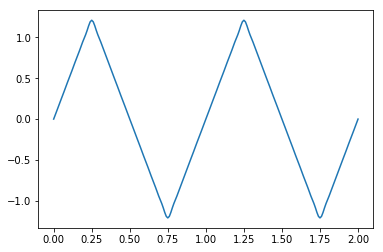

In [17]:
def triangle(domain, freq=1):
    def label(i):
        return 2. * i + 1.
    harmonics = np.asarray([((-1) ** h) * (label(h) ** -2) * sine(domain, freq=freq * label(h)) for h in range(Harmonics)])
    wave = np.sum(harmonics, axis=0)
    return wave

wave = triangle(time_space())
plt.plot(time_space(), wave)

max: 0.9969907724658861 Hz


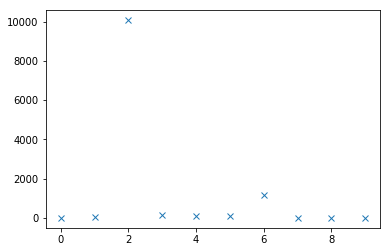

In [18]:
max_hz, spectrum = frequency_spectrum(wave)
print("max: {} Hz".format(max_hz))
plt.plot(spectrum[:Harmonics], 'x')